In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\preethi\OneDrive\Desktop\smoke_detection.csv")

In [3]:
data.head(3)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0


In [4]:
data.shape

(62630, 16)

In [5]:
data.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [6]:
data = data.rename(columns={'Temperature[C]': 'Temperature'})
data = data.rename(columns={'Humidity[%]': 'Humidity'})
data = data.rename(columns={'TVOC[ppb]': 'TVOC'})
data = data.rename(columns={'eCO2[ppm]': 'eCO2'})
data = data.rename(columns={'Raw H2': 'Raw_H2'})
data = data.rename(columns={'Raw Ethanol': 'Raw_Ethanol'})
data = data.rename(columns={'Pressure[hPa]': 'Pressure'})
data = data.rename(columns={'PM1.0': 'PM1'})
data = data.rename(columns={'PM2.5': 'PM2'})
data = data.rename(columns={'NC0.5': 'NC0'})
data = data.rename(columns={'NC1.0': 'NC1'})
data = data.rename(columns={'NC2.5': 'NC2'})
data = data.rename(columns={'Fire Alarm': 'Fire_Alarm'})

In [7]:
data.isnull().sum()

Unnamed: 0     0
UTC            0
Temperature    0
Humidity       0
TVOC           0
eCO2           0
Raw_H2         0
Raw_Ethanol    0
Pressure       0
PM1            0
PM2            0
NC0            0
NC1            0
NC2            0
CNT            0
Fire_Alarm     0
dtype: int64

In [8]:
data.dtypes

Unnamed: 0       int64
UTC              int64
Temperature    float64
Humidity       float64
TVOC             int64
eCO2             int64
Raw_H2           int64
Raw_Ethanol      int64
Pressure       float64
PM1            float64
PM2            float64
NC0            float64
NC1            float64
NC2            float64
CNT              int64
Fire_Alarm       int64
dtype: object

In [10]:
data.Fire_Alarm.value_counts()

1    44757
0    17873
Name: Fire_Alarm, dtype: int64

In [11]:
#visualization

In [12]:
data_cor = data.corr()
data_cor

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT,Fire_Alarm
Temperature,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw_H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw_Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552
PM2,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.083869,-0.084916
NC0,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.094741,-0.128118


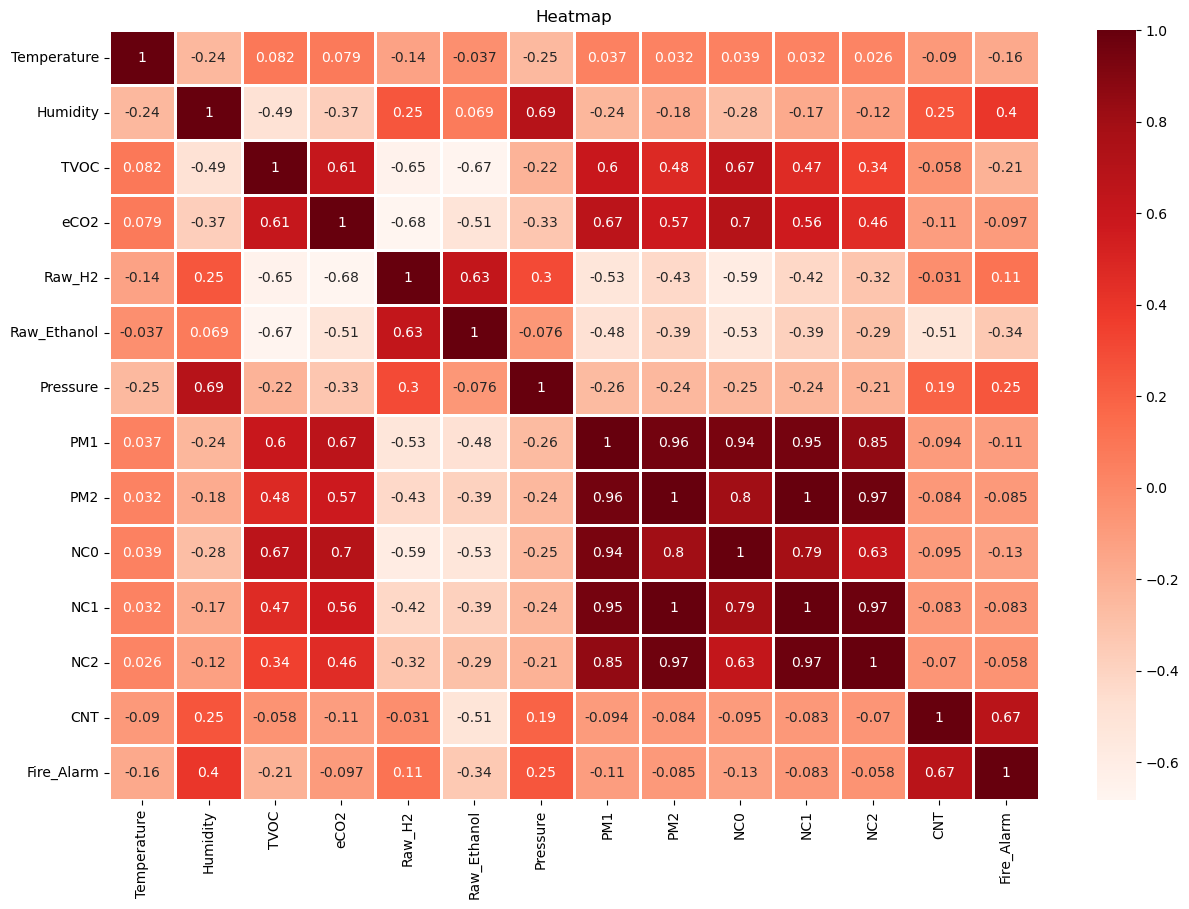

In [13]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(data_cor,linewidth=1,annot=True,cmap=plt.cm.Reds)
plt.title("Heatmap")
plt.show()

<AxesSubplot:xlabel='Fire_Alarm', ylabel='count'>

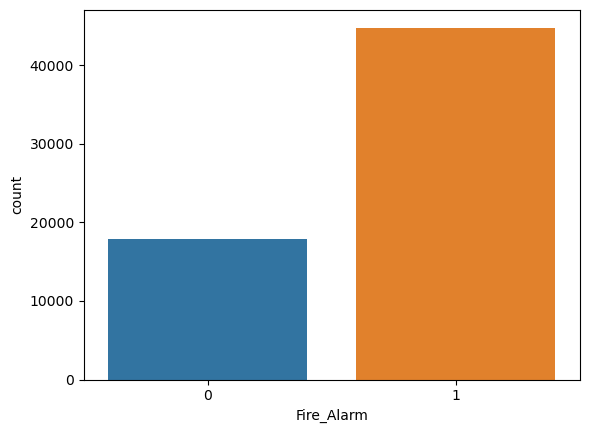

In [14]:
sns.countplot("Fire_Alarm",data=data)

# Base Model

# Splitting Data

In [15]:
data.shape

(62630, 14)

In [16]:
x=data.iloc[:,0:-1]
x.head(3)

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2


In [17]:
y=data.iloc[:,-1]
y.head(3)

0    0
1    0
2    0
Name: Fire_Alarm, dtype: int64

In [18]:
import sklearn
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=100)

In [20]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((50104, 13), (12526, 13), (50104,), (12526,))

# 1.logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [22]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [23]:
lr_p=lr.predict(xtest)
lr_p

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [24]:
#confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
lr_cf=confusion_matrix(lr_p,ytest)
lr_cf

array([[3565,  175],
       [  15, 8771]], dtype=int64)

In [27]:
lr_ac=lr_cf.diagonal().sum()/lr_cf.sum()*100
lr_ac

98.48315503752195

In [28]:
print(classification_report(lr_p,ytest))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3740
           1       0.98      1.00      0.99      8786

    accuracy                           0.98     12526
   macro avg       0.99      0.98      0.98     12526
weighted avg       0.99      0.98      0.98     12526



# 2.Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [30]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [31]:
dt_p=dt.predict(xtest)
dt_p

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
#confusion matrix

In [33]:
dt_cf=confusion_matrix(dt_p,ytest)
dt_cf

array([[3580,    0],
       [   0, 8946]], dtype=int64)

In [34]:
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_ac

100.0

In [35]:
print(classification_report(dt_p,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3580
           1       1.00      1.00      1.00      8946

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



# 3.Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [37]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [38]:
rf_p=rf.predict(xtest)
rf_p

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [39]:
rf_cf=confusion_matrix(rf_p,ytest)
rf_cf

array([[3580,    0],
       [   0, 8946]], dtype=int64)

In [40]:
rf_ac=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_ac

100.0

In [41]:
print(classification_report(rf_p,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3580
           1       1.00      1.00      1.00      8946

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



# 4.KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [43]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [44]:
knn_p=knn.predict(xtest)
knn_p

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
knn_cf=confusion_matrix(knn_p,ytest)
knn_cf

array([[3577,    0],
       [   3, 8946]], dtype=int64)

In [46]:
knn_ac=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_ac

99.97604981638193

In [47]:
print(classification_report(knn_p,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3577
           1       1.00      1.00      1.00      8949

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



# 5.SVM

In [48]:
from sklearn.svm import SVC
svc=SVC()

In [49]:
svc.fit(xtrain,ytrain)

SVC()

In [50]:
svc_p=svc.predict(xtest)
svc_p

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [51]:
svc_cf=confusion_matrix(svc_p,ytest)
svc_cf

array([[3540,  204],
       [  40, 8742]], dtype=int64)

In [52]:
svc_ac=svc_cf.diagonal().sum()/svc_cf.sum()*100
svc_ac

98.05205173239662

In [53]:
print(classification_report(svc_p,ytest))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3744
           1       0.98      1.00      0.99      8782

    accuracy                           0.98     12526
   macro avg       0.98      0.97      0.98     12526
weighted avg       0.98      0.98      0.98     12526



# 6.Naive Bayes

In [54]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [55]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [56]:
nb.fit(xtrain,ytrain)

MultinomialNB()

In [57]:
nb_p=nb.predict(xtest)
nb_p

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
nb_m=confusion_matrix(nb_p,ytest)
nb_m

array([[ 253,   46],
       [3327, 8900]], dtype=int64)

In [59]:
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_acc

73.072010218745

In [60]:
print(classification_report(nb_p,ytest))

              precision    recall  f1-score   support

           0       0.07      0.85      0.13       299
           1       0.99      0.73      0.84     12227

    accuracy                           0.73     12526
   macro avg       0.53      0.79      0.49     12526
weighted avg       0.97      0.73      0.82     12526



# XG Boost

In [61]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [62]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [63]:
xgb_p=xgb.predict(xtest)

In [64]:
xgb_cf=confusion_matrix(xgb_p,ytest)
xgb_cf

array([[3580,    0],
       [   0, 8946]], dtype=int64)

In [65]:
xgb_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_ac

100.0

In [66]:
print(classification_report(xgb_p,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3580
           1       1.00      1.00      1.00      8946

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



# Class Imbalance Techniques

In [67]:
c_0,c_1 = data["Fire_Alarm"].value_counts()
c_0,c_1

(44757, 17873)

In [68]:
train_0 = data[data["Fire_Alarm"]==0]
train_1 = data[data["Fire_Alarm"]==1]

In [69]:
train_0.shape,train_1.shape

((17873, 14), (44757, 14))

# Random under sampling

In [70]:
class_0under=train_0.sample(c_1)

In [71]:
class_0under.head(3)

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT,Fire_Alarm
52965,27.190,48.02,129,400,12796,20597,937.422,2.16,2.24,14.84,2.315,0.052,1823,0
2945,12.278,51.75,142,400,13170,20036,939.636,0.79,0.82,5.45,0.849,0.019,2945,0
56046,47.560,27.41,60000,4595,11725,17171,936.864,1448.70,1505.14,9970.79,1554.826,35.117,4904,0


In [72]:
class_0under.Fire_Alarm.value_counts()

0    17873
Name: Fire_Alarm, dtype: int64

In [73]:
class0_1=pd.concat([class_0under,train_1],axis=0)

In [74]:
class0_1.Fire_Alarm.value_counts()

1    44757
0    17873
Name: Fire_Alarm, dtype: int64

In [75]:
class0_1.shape

(62630, 14)

# Outlier Treatment

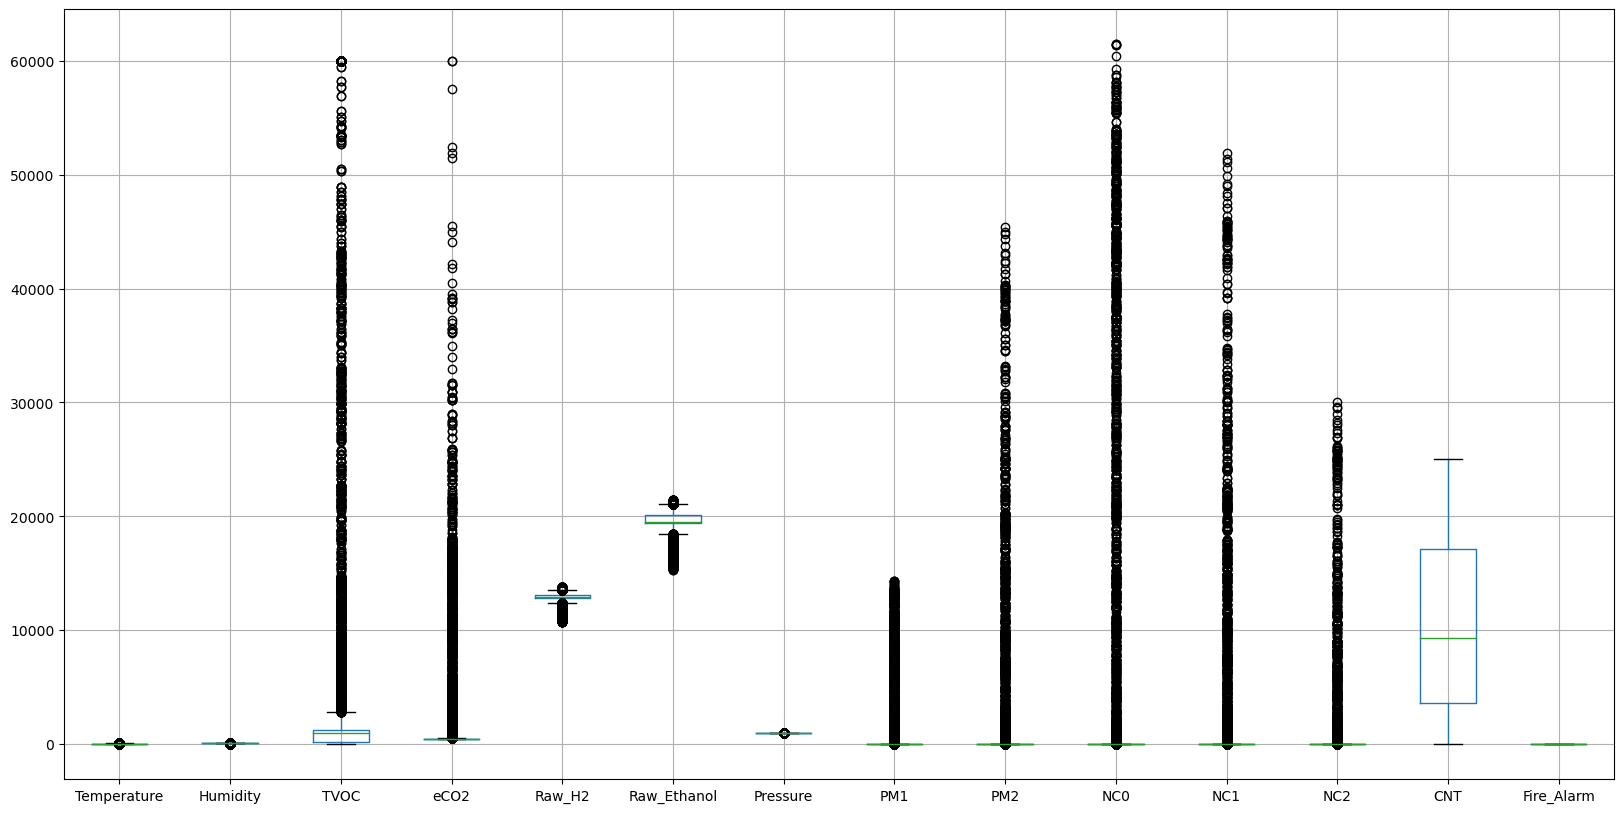

In [76]:
class0_1.boxplot(figsize=(20,10))
plt.show()

In [77]:
class0_1.TVOC.value_counts()

0        2698
60000     928
1141      320
1136      264
1147      258
         ... 
6731        1
7415        1
8845        1
10658       1
466         1
Name: TVOC, Length: 1966, dtype: int64

<AxesSubplot:>

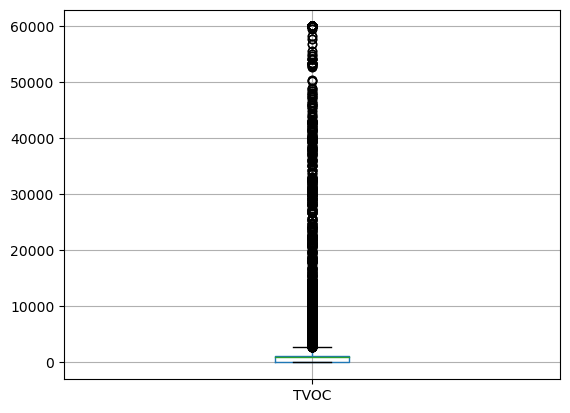

In [78]:
class0_1.boxplot(column="TVOC")

<AxesSubplot:>

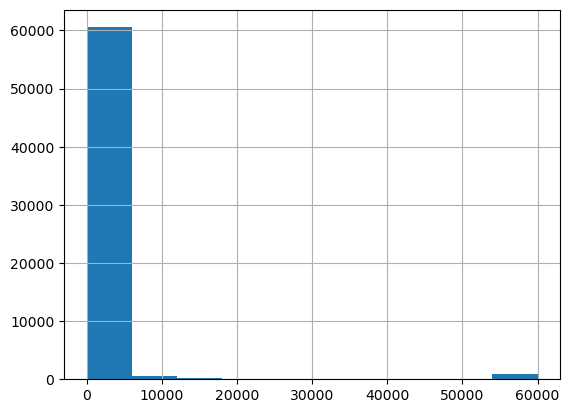

In [79]:
class0_1.TVOC.hist()

<AxesSubplot:xlabel='TVOC', ylabel='Density'>

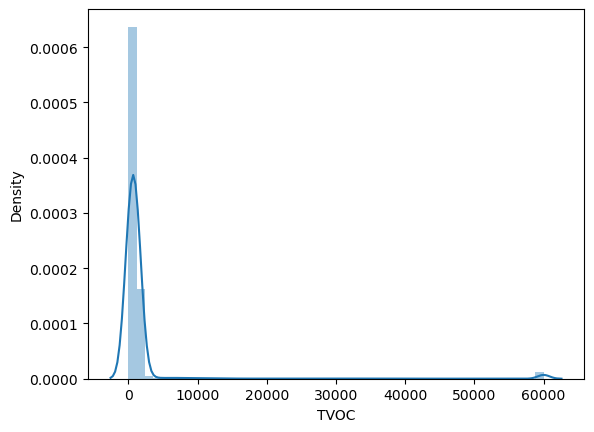

In [80]:
sns.distplot(class0_1.TVOC)

In [81]:
IQR=class0_1.TVOC.quantile(0.75)-class0_1.TVOC.quantile(0.25)
IQR

1059.0

In [82]:
iub1=class0_1["TVOC"].quantile(0.75)+(IQR*3)
iub1

4366.0

In [83]:
class0_1.loc[class0_1["TVOC"]>4366,"age"]=4366

<AxesSubplot:>

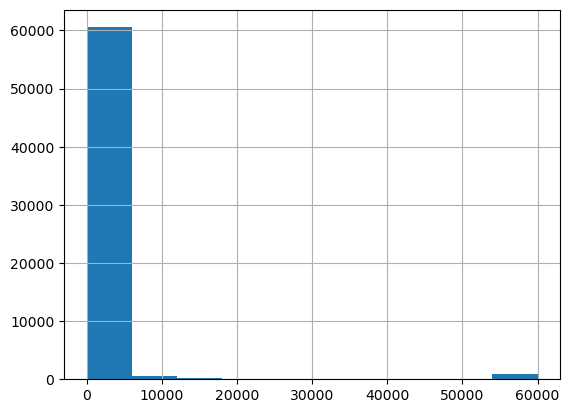

In [84]:
class0_1.TVOC.hist()

<AxesSubplot:xlabel='TVOC', ylabel='Density'>

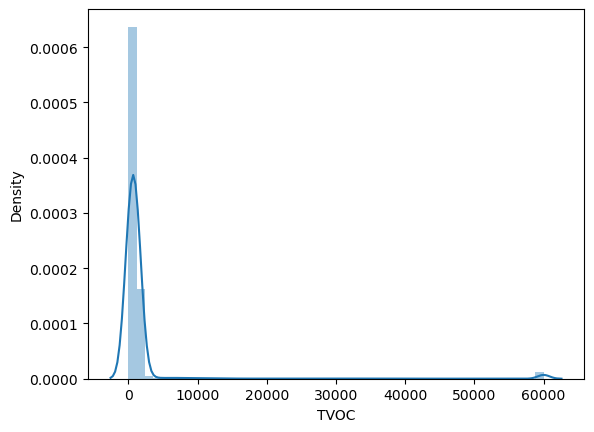

In [85]:
sns.distplot(class0_1.TVOC)

In [ ]:
#modeling
lr=RandomForestClassifier()
lr_scaled=RandomForestClassifier()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

print('r2 score : ', r2_score(y_test,y_pred))
print('MEA : ', mean_absolute_error(y_test,y_pred))

print('r2 score scaled: ', r2_score(y_test,y_pred_scaled))
print('MEA scaled: ', mean_absolute_error(y_test,y_pred_scaled))

# r2 score :  0.9997411234297969
MEA :  5.322263026238757e-05
r2 score scaled:  0.9997411234297969
MEA scaled:  5.322263026238757e-05

# CONCLUSION
#After this cross validation, accuracy, precision, recall, r2score are good. we can conclude that the model is accurate and reliable in making Analysis and Prediction, it is likely a good choice for solving the business problem.